In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autorank import autorank, plot_stats, create_report, latex_table

In [4]:
techniques = ['isvd', 'knn', 'mean', 'median', 'zero']
result_path = '../../imputed_kernels_results'


def get_dataframe(metric: str, percentage: str):
        cols = []
        for technique in techniques:
                cols.append(f'{technique}-{percentage}')


        result = pd.DataFrame(columns=cols)


        for fold in range(10):
                new_row = []
                
                for technique in techniques:
                        f1_score = np.loadtxt(f'{result_path}/{technique}/{percentage}/{metric}.txt')
                        new_row.append(f1_score[fold])
                
                result.loc[fold] = new_row
    
        return result

<h1>Metric: F1_score, Percentage: 10</h1>

In [5]:
data = get_dataframe('F1_score', '10')
data

,isvd-10,knn-10,mean-10,median-10,zero-10
0,0.593200,0.614622,0.578588,0.592930,0.547297
1,0.623172,0.639225,0.601336,0.603774,0.566038
2,0.627824,0.635468,0.615917,0.613769,0.550169
3,0.619718,0.632628,0.589623,0.589623,0.565116
4,0.612981,0.627936,0.581477,0.585882,0.531646
5,0.585194,0.603681,0.569781,0.581986,0.576964
6,0.606635,0.625654,0.586854,0.592506,0.589831
7,0.659142,0.630952,0.597984,0.609375,0.548422
8,0.623153,0.620596,0.606205,0.590522,0.531616
9,0.623345,0.628352,0.566706,0.570048,0.530565


In [17]:
result = autorank(data, alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
           meanrank      mean       std  ci_lower  ci_upper effect_size  \
zero-10        4.80  0.553766  0.020330  0.543281  0.564252         0.0   
mean-10        3.95  0.589447  0.015944  0.578962  0.599932   -1.953071   
median-10      3.25  0.593042  0.013047  0.582556  0.603527   -2.299305   
isvd-10        1.80  0.617436  0.020321  0.606951  0.627922   -3.132524   
knn-10         1.20  0.625912  0.010536  0.615426  0.636397    -4.45576   

            magnitude  
zero-10    negligible  
mean-10         large  
median-10       large  
isvd-10         large  
knn-10          large  
pvalue=1.505614149650135e-12
cd=None
omnibus=anova
posthoc=tukeyhsd
all_normal=True
pvals_shapiro=[0.8211420774459839, 0.3702588379383087, 0.4561176002025604, 0.9329076409339905, 0.44662681221961975]
homoscedastic=True
pval_homogeneity=0.26792669064743657
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.01
num_samples=10
posterior_matrix=
None
decision_matrix=
None
rope=None
ro

In [18]:
create_report(result)

The statistical analysis was conducted for 5 populations with 10 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.370). Therefore, we assume that all populations are normal.
We applied Bartlett's test for homogeneity and failed to reject the null hypothesis (p=0.268) that the data is homoscedastic. Thus, we assume that our data is homoscedastic.
Because we have more than two populations and all populations are normal and homoscedastic, we use repeated measures ANOVA as omnibus test to determine if there are any significant differences between the mean values of the populations. If the results of the ANOVA test are significant, we use the post-hoc Tukey HSD test to infer which differences are significant. We report the mean value (M) and the standard deviation (SD) for each population. Populations are significantly different if their confid

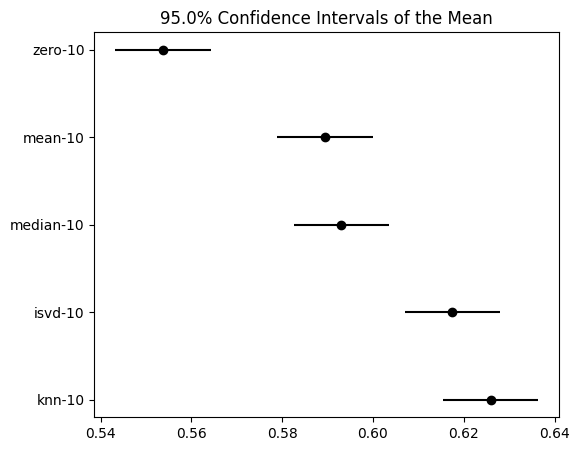

In [19]:
plot_stats(result)
plt.show()

In [20]:
latex_table(result)

\begin{table}[h]
\centering
\begin{tabular}{lrrlll}
\toprule
{} &     M &    SD &              CI &    \$d\$ &   Magnitude \\
\midrule
zero-10   & 0.554 & 0.020 &  [0.543, 0.564] &  0.000 &  negligible \\
mean-10   & 0.589 & 0.016 &  [0.579, 0.600] & -1.953 &       large \\
median-10 & 0.593 & 0.013 &  [0.583, 0.604] & -2.299 &       large \\
isvd-10   & 0.617 & 0.020 &  [0.607, 0.628] & -3.133 &       large \\
knn-10    & 0.626 & 0.011 &  [0.615, 0.636] & -4.456 &       large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


/home/victor/.local/lib/python3.9/site-packages/autorank/autorank.py:697: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_string = table_df.to_latex(float_format=float_format, na_rep='-').strip()


<h1>Metric: Pearson correlation, Percentage: 10</h1>

In [21]:
data = get_dataframe('Pearson_correlation', '10')
data

,isvd-10,knn-10,mean-10,median-10,zero-10
0,0.786835,0.852042,0.769798,0.776255,0.724899
1,0.763554,0.831600,0.758332,0.762980,0.725286
2,0.787784,0.843122,0.756529,0.761488,0.715016
3,0.779060,0.837110,0.771085,0.775521,0.717311
4,0.764179,0.844365,0.770005,0.777029,0.732130
5,0.793685,0.837201,0.770410,0.773906,0.721701
6,0.789436,0.859165,0.788646,0.795277,0.752376
7,0.825406,0.862749,0.790581,0.795970,0.725856
8,0.788560,0.867329,0.790828,0.795410,0.741020
9,0.801110,0.845107,0.770560,0.776428,0.712334


In [22]:
result = autorank(data, alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
           meanrank      mean       std  ci_lower  ci_upper effect_size  \
zero-10         5.0  0.726793  0.012273  0.718153  0.735432         0.0   
mean-10         3.8  0.773677  0.012424  0.765038  0.782317   -3.796725   
median-10       2.7  0.779026  0.012656  0.770387  0.787666    -4.19007   
isvd-10         2.5  0.787961  0.017802  0.779321    0.7966    -4.00067   
knn-10          1.0  0.847979  0.011934   0.83934  0.856618  -10.011618   

            magnitude  
zero-10    negligible  
mean-10         large  
median-10       large  
isvd-10         large  
knn-10          large  
pvalue=2.906232491529766e-25
cd=None
omnibus=anova
posthoc=tukeyhsd
all_normal=True
pvals_shapiro=[0.0777198076248169, 0.32066187262535095, 0.5870745778083801, 0.06680566072463989, 0.3266863524913788]
homoscedastic=True
pval_homogeneity=0.7053842716927925
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.01
num_samples=10
posterior_matrix=
None
decision_matrix=
None
rope=None
ro

In [23]:
create_report(result)

The statistical analysis was conducted for 5 populations with 10 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.067). Therefore, we assume that all populations are normal.
We applied Bartlett's test for homogeneity and failed to reject the null hypothesis (p=0.705) that the data is homoscedastic. Thus, we assume that our data is homoscedastic.
Because we have more than two populations and all populations are normal and homoscedastic, we use repeated measures ANOVA as omnibus test to determine if there are any significant differences between the mean values of the populations. If the results of the ANOVA test are significant, we use the post-hoc Tukey HSD test to infer which differences are significant. We report the mean value (M) and the standard deviation (SD) for each population. Populations are significantly different if their confid

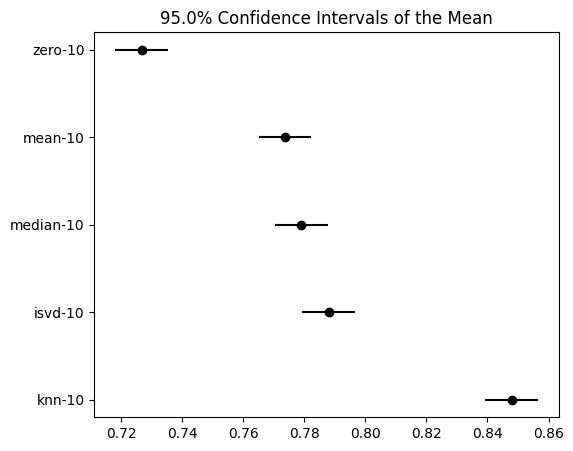

In [24]:
plot_stats(result)
plt.show()

In [25]:
latex_table(result)

\begin{table}[h]
\centering
\begin{tabular}{lrrlll}
\toprule
{} &     M &    SD &              CI &     \$d\$ &   Magnitude \\
\midrule
zero-10   & 0.727 & 0.012 &  [0.718, 0.735] &   0.000 &  negligible \\
mean-10   & 0.774 & 0.012 &  [0.765, 0.782] &  -3.797 &       large \\
median-10 & 0.779 & 0.013 &  [0.770, 0.788] &  -4.190 &       large \\
isvd-10   & 0.788 & 0.018 &  [0.779, 0.797] &  -4.001 &       large \\
knn-10    & 0.848 & 0.012 &  [0.839, 0.857] & -10.012 &       large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


/home/victor/.local/lib/python3.9/site-packages/autorank/autorank.py:697: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_string = table_df.to_latex(float_format=float_format, na_rep='-').strip()


<h1>Metric: RMSE, Percentage: 10</h1>

In [26]:
data = get_dataframe('RMSE', '10')
data

,isvd-10,knn-10,mean-10,median-10,zero-10
0,2.122768,1.737775,2.221801,2.184834,2.491391
1,2.225089,1.797991,2.220971,2.201349,2.459227
2,2.060253,1.737535,2.216004,2.186896,2.457613
3,2.085192,1.743146,2.125185,2.099808,2.392679
4,2.197323,1.696963,2.112756,2.082456,2.396346
5,2.016030,1.768694,2.153371,2.137475,2.461677
6,2.123183,1.692632,2.120233,2.091615,2.389940
7,1.964302,1.717698,2.181843,2.145625,2.552421
8,2.154920,1.667870,2.139551,2.109538,2.443578
9,2.039390,1.765891,2.207568,2.173448,2.541722


In [27]:
result = autorank(data, alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
           meanrank      mean       std  ci_lower  ci_upper effect_size  \
knn-10          5.0  1.732620  0.039622  1.697253  1.767986         0.0   
median-10       3.4  2.141304  0.043854  2.105938  2.176671   -9.779152   
isvd-10         3.2  2.098845  0.081728  2.063479  2.134211   -5.702353   
mean-10         2.4  2.169928  0.044616  2.134562  2.205295  -10.364576   
zero-10         1.0  2.458659  0.057695  2.423293  2.494026  -14.670276   

            magnitude  
knn-10     negligible  
median-10       large  
isvd-10         large  
mean-10         large  
zero-10         large  
pvalue=8.131529663440653e-26
cd=None
omnibus=anova
posthoc=tukeyhsd
all_normal=True
pvals_shapiro=[0.09332724660634995, 0.9840733408927917, 0.32927531003952026, 0.9569670557975769, 0.2658359706401825]
homoscedastic=True
pval_homogeneity=0.16208180048172513
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.01
num_samples=10
posterior_matrix=
None
decision_matrix=
None
rope=None
r

In [28]:
create_report(result)

The statistical analysis was conducted for 5 populations with 10 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.093). Therefore, we assume that all populations are normal.
We applied Bartlett's test for homogeneity and failed to reject the null hypothesis (p=0.162) that the data is homoscedastic. Thus, we assume that our data is homoscedastic.
Because we have more than two populations and all populations are normal and homoscedastic, we use repeated measures ANOVA as omnibus test to determine if there are any significant differences between the mean values of the populations. If the results of the ANOVA test are significant, we use the post-hoc Tukey HSD test to infer which differences are significant. We report the mean value (M) and the standard deviation (SD) for each population. Populations are significantly different if their confid

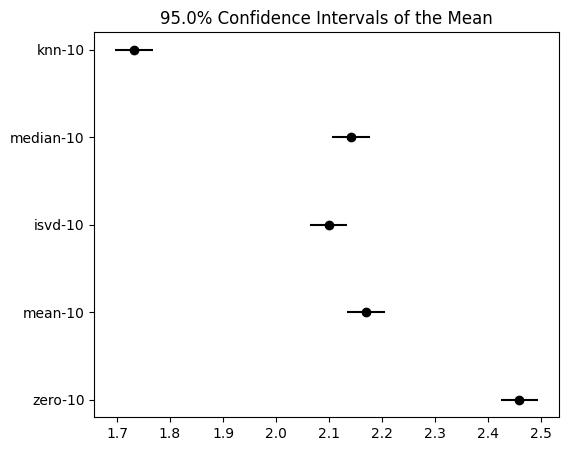

In [29]:
plot_stats(result)
plt.show()

In [30]:
latex_table(result)

\begin{table}[h]
\centering
\begin{tabular}{lrrlll}
\toprule
{} &     M &    SD &              CI &     \$d\$ &   Magnitude \\
\midrule
knn-10    & 1.733 & 0.040 &  [1.697, 1.768] &   0.000 &  negligible \\
median-10 & 2.141 & 0.044 &  [2.106, 2.177] &  -9.779 &       large \\
isvd-10   & 2.099 & 0.082 &  [2.063, 2.134] &  -5.702 &       large \\
mean-10   & 2.170 & 0.045 &  [2.135, 2.205] & -10.365 &       large \\
zero-10   & 2.459 & 0.058 &  [2.423, 2.494] & -14.670 &       large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


/home/victor/.local/lib/python3.9/site-packages/autorank/autorank.py:697: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_string = table_df.to_latex(float_format=float_format, na_rep='-').strip()
